K-Means Clustering

In [350]:
import numpy as np

In [351]:
import pandas as pd

In [352]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading Data Set which is named as BR_mod.csv

In [353]:
a=pd.read_csv('BR_mod.csv')

Checking number of null values in each features.

In [354]:
a.isnull().sum()


patient.age_at_initial_pathologic_diagnosis                                0
patient.anatomic_neoplasm_subdivisions.anatomic_neoplasm_subdivision       0
patient.axillary_lymph_node_stage_method_type                            216
patient.breast_carcinoma_estrogen_receptor_status                         49
patient.breast_carcinoma_progesterone_receptor_status                     50
patient.breast_carcinoma_surgical_procedure_name                          56
patient.gender                                                             0
patient.histological_type                                                  1
patient.history_of_neoadjuvant_treatment                                   1
patient.initial_pathologic_diagnosis_method                               98
patient.lab_proc_her2_neu_immunohistochemistry_receptor_status           178
patient.lymph_node_examined_count                                        126
patient.margin_status                                                     68

Total null values in our given dataset

In [355]:
a.isnull().sum().sum()

1334

Using fillna function of pandas for filling missing values.
ffill for Forward filling and bfill for Backward filling

In [356]:
a.fillna(method='ffill',limit=54,inplace= True)
a.fillna(method='bfill',limit=54,inplace= True)
a.fillna(method='ffill',limit=54,inplace= True)
a.fillna(method='bfill',limit=54,inplace= True)

In [357]:
a.isnull().sum().sum()

0

Here, I have used Silhouette analysis for predicting value of 'K'. I have imported only for number of cluster visualisation.

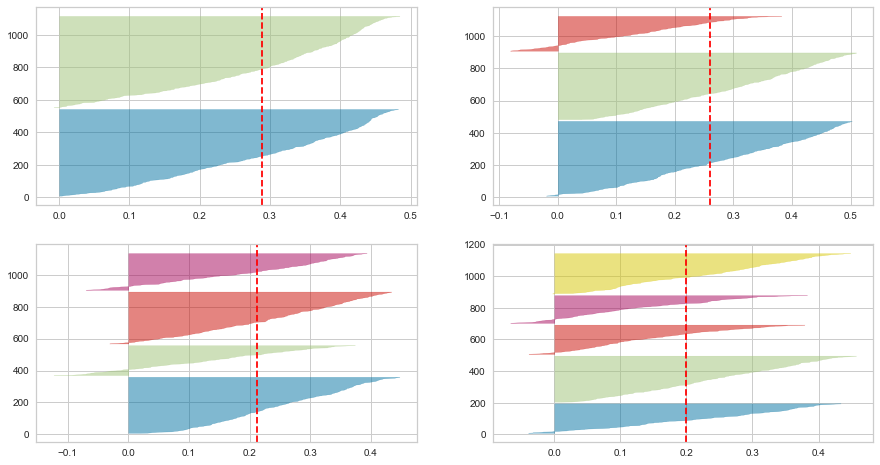

In [359]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(a)

In [321]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(a)
df = pd.DataFrame(data = principalComponents , columns = ['x', 'y'])

In [322]:
e = pd.DataFrame(df)

In [300]:
A = e.iloc[:,[0,1]].values

Taking number of iterartion to be 100, you can choose any value.  

In [301]:
num_iter=100

I am considering K =4 from Silhouette analysis.

In [302]:
K=4

In [303]:
Centr=np.array([]).reshape(c,0)

In [304]:
import random as rd
for i in range(K):
    rand=rd.randint(0,b-1)
    Centr=np.c_[Centr,A[rand]]

In [305]:
Answer ={}

I am using Euclidean Distance formula for calculating distance between points.

In [306]:
Euclid_Dist=np.array([]).reshape(b,0)
for k in range(K): 
    temp=np.sum((A-Centr[:,k])**2,axis=1)
    Euclid_Dist=np.c_[Euclid_Dist,temp]
    C=np.argmin(Euclid_Dist,axis=1)+1

In [307]:
X={}

In [308]:
for k in range(K):
    X[k+1]=np.array([]).reshape(2,0)
for i in range(b):
    X[C[i]]=np.c_[X[C[i]],A[i]]
     
for k in range(K):
    X[k+1]=X[k+1].T
    
for k in range(K):
     Centr[:,k]=np.mean(X[k+1],axis=0)

In [309]:
for i in range(num_iter):
    Euclid_Dist=np.array([]).reshape(b,0)
    for k in range(K):
        temp=np.sum((A-Centr[:,k])**2,axis=1)
        Euclid_Dist=np.c_[Euclid_Dist,temp]
        C=np.argmin(Euclid_Dist,axis=1)+1
    
    X={}
    for k in range(K):
        X[k+1]=np.array([]).reshape(2,0)
    for i in range(b):
        X[C[i]]=np.c_[X[C[i]],A[i]]
    for k in range(K):
        X[k+1]=X[k+1].T
    for k in range(K):
        Centr[:,k]=np.mean(X[k+1],axis=0)
        count +=1
    Answer=X

Summary for the given dataset using K -Means Clustering are as follows :
 Cluster 1  total elements = 234
 Cluster 2  total elements = 365
 Cluster 3  total elements = 172
 Cluster 4  total elements = 326
Total number of data points in all clusters = 1097


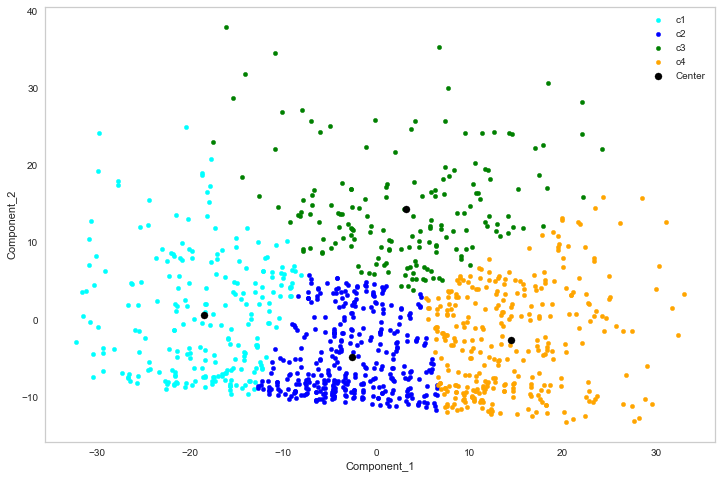

In [311]:
plt.figure(figsize=(12,8))
color=['cyan','blue','green','orange']
labels=['c1','c2','c3','c4']
for k in range(K):
    plt.scatter(Answer[k+1][:,0],Answer[k+1][:,1],c=color[k],label=labels[k],s= 20)
s =0
print('Summary for the given dataset using K -Means Clustering are as follows :')
for i in X:
    print(' Cluster %d  total elements = %d' %(i ,len(X[i])))
    s+=len(X[i])
print('Total number of data points in all clusters = %d' %s)
plt.scatter(Centr[0,:],Centr[1,:],s=50,c='black',label='Center',marker='o')
plt.xlabel('Component_1')
plt.ylabel('Component_2')
plt.legend()
plt.grid()
plt.show()

c1 represents Cluster 1, 
c2 represents Cluster 2, 
c3 represents Cluster 3, 
c4 represents Cluster 4.

Black Dot representing Centroid for each Cluster.